In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import datetime
from sklearn.pipeline import Pipeline
#import plotly.express as px

In [2]:
merc = pd.read_csv('merc.csv')

In [3]:
merc.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [4]:
merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


C:\Users\lucas.lima\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


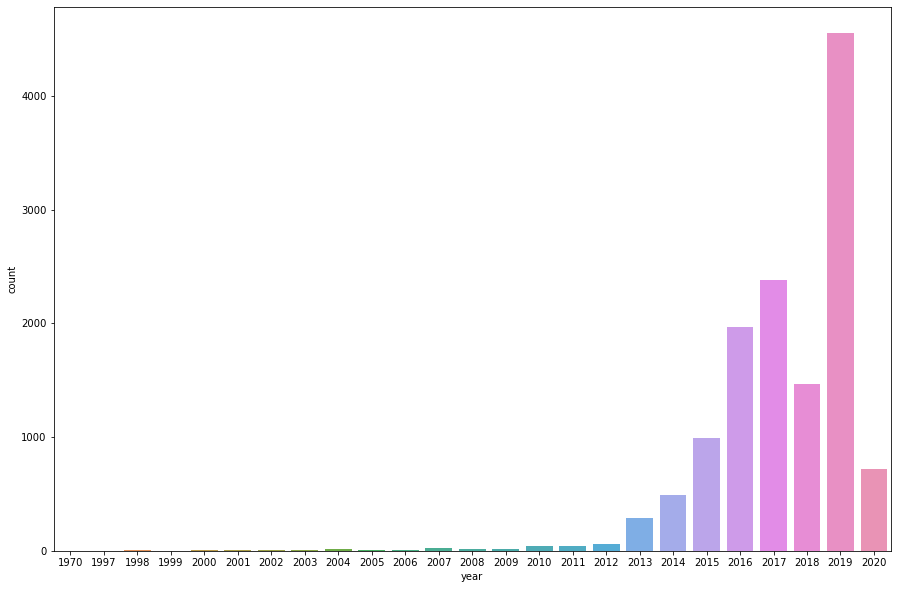

In [5]:
#model_count=cars
#ax2= px.treemap(model_count,path=["model"],title="Number of each model")
##ax2.show()
plt.figure(figsize=(15, 10))
sns.countplot(merc['year'])
plt.show()

In [6]:
merc_group = merc.groupby('model').count().sort_values('tax', ascending=False)

In [7]:
top_cars = merc_group.index[:10]
top_cars

Index([' C Class', ' A Class', ' E Class', ' GLC Class', ' GLA Class',
       ' B Class', ' CL Class', ' GLE Class', ' SL CLASS', ' CLS Class'],
      dtype='object', name='model')

In [8]:
sucessful = merc[merc['model'].isin(top_cars)]
#sucessful = sucessful.reset_index()

In [13]:
plt.figure(figsize=(15, 10))
sns.countplot(x='mileage', data=merc[merc['model']].isin(list(top_cars)))
plt.show()

KeyError: "None of [Index([' SLK', ' S Class', ' SL CLASS', ' G Class', ' G Class', ' SL CLASS',\n       ' GLE Class', ' S Class', ' G Class', ' GLA Class',\n       ...\n       ' A Class', ' CLA Class', ' B Class', ' C Class', ' C Class',\n       ' C Class', ' B Class', ' GLC Class', ' CLS Class', ' S Class'],\n      dtype='object', length=13119)] are in the [columns]"

<Figure size 1080x720 with 0 Axes>

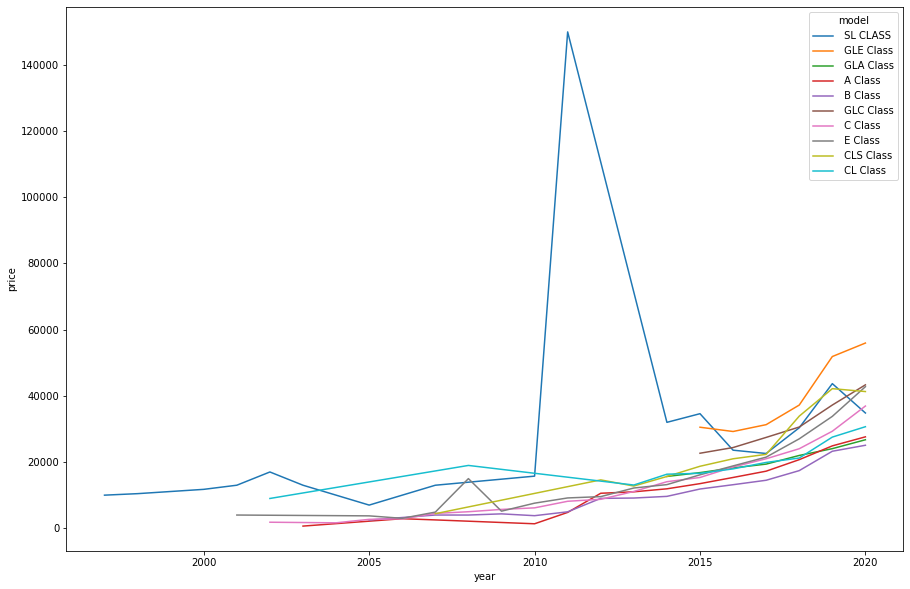

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(x='year', y='price', hue='model', data=merc[merc['model'].isin(top_cars)], ci=None)
plt.show()

In [15]:
merc.loc[merc['year']==1997]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11912,SL CLASS,1997,9995,Automatic,76000,Petrol,255,28.2,3.2


In [18]:
merc['year'].min()

1970

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [20]:
df = pd.get_dummies(data=merc, columns=['model','transmission','fuelType'])

In [21]:
y = df['price'].values
x = df.drop('price', axis=1).values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 1)

In [23]:
pipe = Pipeline([('scaler', StandardScaler()), ('LinReg', LinearRegression())])

In [24]:
#linear_regression = LinearRegression()
#linear_regression.fit(x_train,y_train)
#y_pred_lin_reg = linear_regression.predict(x_test)
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LinReg', LinearRegression())])

In [25]:
pipe.score(x_train, y_train)

0.7569729291948661